Generated 201 points for the airfoil.
First 5 points:
 [[ 1.00000000e+00 -1.66164608e-17]
 [ 9.99755664e-01  5.22202354e-05]
 [ 9.99022882e-01  2.08720892e-04]
 [ 9.97802327e-01  4.69022760e-04]
 [ 9.96095124e-01  8.32330262e-04]]


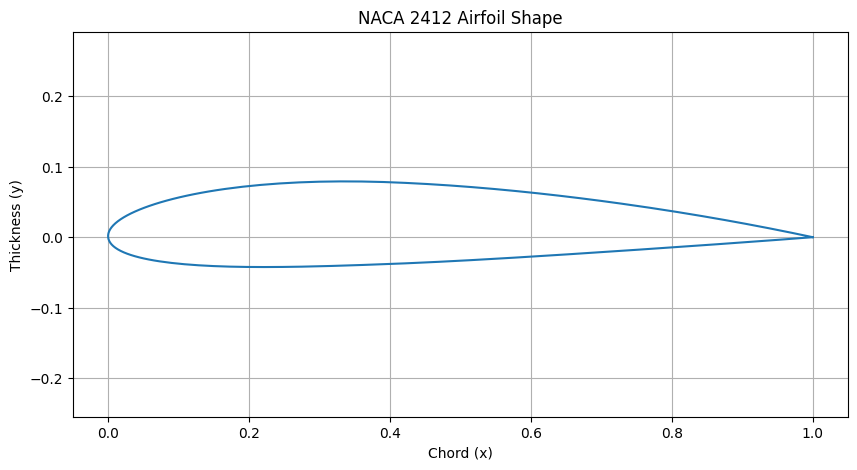

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_naca4_coords(naca_code="2412", n_points=200):
    """
    Generates the coordinates of a NACA 4-digit airfoil.
    """
    if len(naca_code) != 4:
        raise ValueError("NACA code must be 4 digits long.")

    m = int(naca_code[0]) / 100.0
    p = int(naca_code[1]) / 10.0
    t = int(naca_code[2:]) / 100.0

    beta = np.linspace(0, np.pi, n_points // 2 + 1)
    x = (1 - np.cos(beta)) / 2

    y_t = 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1036 * x**4)

    y_c = np.zeros_like(x)
    dyc_dx = np.zeros_like(x)

    if p > 0:
        front_x = x[x <= p]
        back_x = x[x > p]

        y_c[x <= p] = (m / p**2) * (2 * p * front_x - front_x**2)
        y_c[x > p] = (m / (1 - p)**2) * ((1 - 2 * p) + 2 * p * back_x - back_x**2)

        dyc_dx[x <= p] = (2 * m / p**2) * (p - front_x)
        dyc_dx[x > p] = (2 * m / (1 - p)**2) * (p - back_x)

    theta = np.arctan(dyc_dx)

    x_upper = x - y_t * np.sin(theta)
    y_upper = y_c + y_t * np.cos(theta)
    x_lower = x + y_t * np.sin(theta)
    y_lower = y_c - y_t * np.cos(theta)

    coords = np.vstack([
        np.hstack([x_upper[::-1], x_lower[1:]]),
        np.hstack([y_upper[::-1], y_lower[1:]])
    ]).T

    return coords

# --- Main part of the script ---
if __name__ == '__main__':
    # 1. Generate the airfoil coordinates
    airfoil_coords = generate_naca4_coords(naca_code="2412", n_points=200)
    print(f"Generated {len(airfoil_coords)} points for the airfoil.")
    print("First 5 points:\n", airfoil_coords[:5])

    # 2. Plot the coordinates to verify
    plt.figure(figsize=(10, 5))
    plt.plot(airfoil_coords[:, 0], airfoil_coords[:, 1])
    plt.title("NACA 2412 Airfoil Shape")
    plt.xlabel("Chord (x)")
    plt.ylabel("Thickness (y)")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

Created a binary mask with shape: (128, 128)


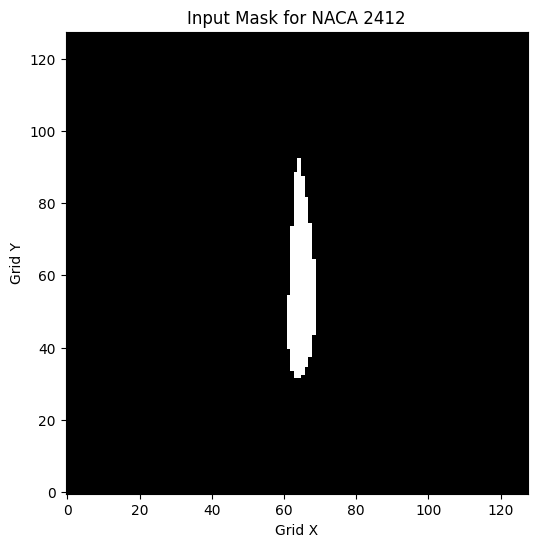

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

# (Paste the generate_naca4_coords function from Step 1 here)
def generate_naca4_coords(naca_code="2412", n_points=200):
    # ... (same code as above)
    if len(naca_code) != 4:
        raise ValueError("NACA code must be 4 digits long.")
    m = int(naca_code[0]) / 100.0
    p = int(naca_code[1]) / 10.0
    t = int(naca_code[2:]) / 100.0
    beta = np.linspace(0, np.pi, n_points // 2 + 1)
    x = (1 - np.cos(beta)) / 2
    y_t = 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1036 * x**4)
    y_c = np.zeros_like(x)
    dyc_dx = np.zeros_like(x)
    if p > 0:
        front_x = x[x <= p]
        back_x = x[x > p]
        y_c[x <= p] = (m / p**2) * (2 * p * front_x - front_x**2)
        y_c[x > p] = (m / (1 - p)**2) * ((1 - 2 * p) + 2 * p * back_x - back_x**2)
        dyc_dx[x <= p] = (2 * m / p**2) * (p - front_x)
        dyc_dx[x > p] = (2 * m / (1 - p)**2) * (p - back_x)
    theta = np.arctan(dyc_dx)
    x_upper = x - y_t * np.sin(theta)
    y_upper = y_c + y_t * np.cos(theta)
    x_lower = x + y_t * np.sin(theta)
    y_lower = y_c - y_t * np.cos(theta)
    coords = np.vstack([np.hstack([x_upper[::-1], x_lower[1:]]), np.hstack([y_upper[::-1], y_lower[1:]])]).T
    return coords


def create_airfoil_mask(coords, grid_size=128, x_range=(-0.5, 1.5), y_range=(-1.0, 1.0)):
    """
    Creates a binary mask of the airfoil on a grid.
    """
    mask = np.zeros((grid_size, grid_size), dtype=np.float32)

    # Scale and shift coordinates to pixel indices
    x_coords = ((coords[:, 0] - x_range[0]) / (x_range[1] - x_range[0])) * (grid_size - 1)
    y_coords = ((coords[:, 1] - y_range[0]) / (y_range[1] - y_range[0])) * (grid_size - 1)

    # Use scikit-image to draw and fill the polygon
    rr, cc = polygon(y_coords, x_coords, shape=mask.shape)
    mask[rr, cc] = 1.0
    return mask

# --- Main part of the script ---
if __name__ == '__main__':
    # 1. Define simulation domain
    GRID_SIZE = 128

    # 2. Generate the airfoil coordinates
    airfoil_coords = generate_naca4_coords(naca_code="2412", n_points=200)

    # 3. Create the binary mask
    input_mask = create_airfoil_mask(airfoil_coords, grid_size=GRID_SIZE)
    print(f"Created a binary mask with shape: {input_mask.shape}")

    # 4. Plot the mask to verify
    plt.figure(figsize=(6, 6))
    plt.imshow(input_mask.T, origin='lower', cmap='gray')
    plt.title("Input Mask for NACA 2412")
    plt.xlabel("Grid X")
    plt.ylabel("Grid Y")
    plt.show()

Simulating flow at 5.0 degrees angle of attack.
Generated flow fields with shape: (128, 128)


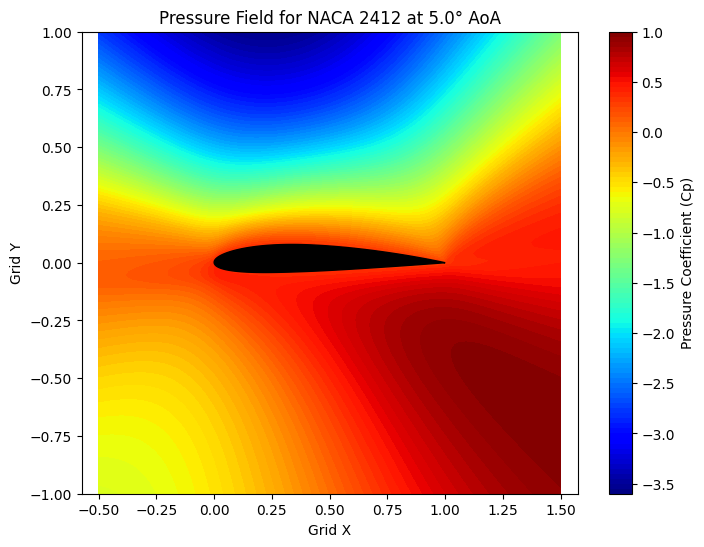

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

# (Paste the generate_naca4_coords function from Step 1 here)
def generate_naca4_coords(naca_code="2412", n_points=200):
    # ... (same code as before)
    if len(naca_code) != 4:
        raise ValueError("NACA code must be 4 digits long.")
    m = int(naca_code[0]) / 100.0
    p = int(naca_code[1]) / 10.0
    t = int(naca_code[2:]) / 100.0
    beta = np.linspace(0, np.pi, n_points // 2 + 1)
    x = (1 - np.cos(beta)) / 2
    y_t = 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1036 * x**4)
    y_c = np.zeros_like(x)
    dyc_dx = np.zeros_like(x)
    if p > 0:
        front_x = x[x <= p]
        back_x = x[x > p]
        y_c[x <= p] = (m / p**2) * (2 * p * front_x - front_x**2)
        y_c[x > p] = (m / (1 - p)**2) * ((1 - 2 * p) + 2 * p * back_x - back_x**2)
        dyc_dx[x <= p] = (2 * m / p**2) * (p - front_x)
        dyc_dx[x > p] = (2 * m / (1 - p)**2) * (p - back_x)
    theta = np.arctan(dyc_dx)
    x_upper = x - y_t * np.sin(theta)
    y_upper = y_c + y_t * np.cos(theta)
    x_lower = x + y_t * np.sin(theta)
    y_lower = y_c - y_t * np.cos(theta)
    coords = np.vstack([np.hstack([x_upper[::-1], x_lower[1:]]), np.hstack([y_upper[::-1], y_lower[1:]])]).T
    return coords


# (Paste the Panel Method Solver code here)
def panel_method_solver(coords, V_inf=1.0, alpha_deg=0.0):
    # ... (full solver code as provided in the complete script)
    num_panels = len(coords) - 1
    alpha_rad = np.deg2rad(alpha_deg)
    pcp = (coords[:-1] + coords[1:]) / 2
    dx = coords[1:, 0] - coords[:-1, 0]
    dy = coords[1:, 1] - coords[:-1, 1]
    S = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx)
    Vn = V_inf * np.sin(alpha_rad - theta)
    Vt = V_inf * np.cos(alpha_rad - theta)
    I = np.zeros((num_panels, num_panels))
    J = np.zeros((num_panels, num_panels))
    for i in range(num_panels):
        for j in range(num_panels):
            if i != j:
                A = -(pcp[i,0] - coords[j,0])*np.cos(theta[j]) - (pcp[i,1] - coords[j,1])*np.sin(theta[j])
                B = (pcp[i,0] - coords[j,0])**2 + (pcp[i,1] - coords[j,1])**2
                Cn = -np.cos(theta[i]-theta[j])
                Dn = (pcp[i,0] - coords[j,0])*np.cos(theta[i]) + (pcp[i,1] - coords[j,1])*np.sin(theta[i])
                I[i,j] = Cn/2*np.log((S[j]**2 + 2*A*S[j] + B)/B) + (Dn-A*Cn)/np.sqrt(B-A**2)*(np.arctan2((S[j]+A),np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2)))
                Ct = np.sin(theta[j]-theta[i])
                Dt = (pcp[i,0] - coords[j,0])*np.sin(theta[i]) - (pcp[i,1] - coords[j,1])*np.cos(theta[i])
                J[i,j] = Ct/2*np.log((S[j]**2 + 2*A*S[j] + B)/B) + (Dt-A*Ct)/np.sqrt(B-A**2)*(np.arctan2((S[j]+A),np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2)))
    np.fill_diagonal(I, np.pi)
    A = np.zeros((num_panels + 1, num_panels + 1))
    A[:num_panels, :num_panels] = I
    A[:num_panels, -1] = np.sum(J, axis=1)
    A[-1, 0] = J[0,0] + J[-1, -1]
    A[-1, -1] = 2*np.pi + np.sum(J[0, :]) + np.sum(J[-1, :])
    for j in range(1, num_panels):
        A[-1,j] = J[0,j] + J[-1,j-1]
    b = np.zeros(num_panels + 1)
    b[:-1] = -Vn * 2*np.pi
    b[-1] = -(Vt[0] + Vt[-1])*2*np.pi
    solution = np.linalg.solve(A, b)
    gamma = solution[:-1]
    Gamma = solution[-1]
    return gamma, Gamma

def get_flow_field(coords, gamma, Gamma, X, Y, V_inf=1.0, alpha_deg=0.0):
    # ... (full get_flow_field code as provided in the complete script)
    alpha_rad = np.deg2rad(alpha_deg)
    num_panels = len(coords) - 1
    dx = coords[1:, 0] - coords[:-1, 0]
    dy = coords[1:, 1] - coords[:-1, 1]
    S = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx)
    u = V_inf * np.cos(alpha_rad) * np.ones_like(X)
    v = V_inf * np.sin(alpha_rad) * np.ones_like(X)
    for i in range(num_panels):
        xc, yc = coords[i]
        A = -(X-xc)*np.cos(theta[i]) - (Y-yc)*np.sin(theta[i])
        B = (X-xc)**2 + (Y-yc)**2
        u_s = gamma[i]/(2*np.pi)*( (X-xc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 - (Y-yc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        v_s = gamma[i]/(2*np.pi)*( (Y-yc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 + (X-xc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        u_v = -Gamma/(2*np.pi)*( (Y-yc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 + (X-xc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        v_v = Gamma/(2*np.pi)*( (X-xc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 - (Y-yc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        u += u_s + u_v
        v += v_s + v_v
    Cp_field = 1.0 - (u**2 + v**2) / V_inf**2
    return u, v, Cp_field

# --- Main part of the script ---
if __name__ == '__main__':
    # 1. Define grid and airfoil
    GRID_SIZE = 128
    x_range = (-0.5, 1.5)
    y_range = (-1.0, 1.0)
    x = np.linspace(x_range[0], x_range[1], GRID_SIZE)
    y = np.linspace(y_range[0], y_range[1], GRID_SIZE)
    X, Y = np.meshgrid(x, y)

    airfoil_coords = generate_naca4_coords(naca_code="2412", n_points=200)

    # 2. Set flow conditions
    angle_of_attack_deg = 5.0
    print(f"Simulating flow at {angle_of_attack_deg} degrees angle of attack.")

    # 3. Run solver
    gamma, Gamma = panel_method_solver(airfoil_coords, alpha_deg=angle_of_attack_deg)
    Ux_field, Uy_field, Cp_field = get_flow_field(airfoil_coords, gamma, Gamma, X, Y, alpha_deg=angle_of_attack_deg)

    print(f"Generated flow fields with shape: {Cp_field.shape}")

    # 4. Visualize the pressure field to verify
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Cp_field, levels=100, cmap='jet')
    plt.colorbar(label="Pressure Coefficient (Cp)")
    plt.fill(airfoil_coords[:, 0], airfoil_coords[:, 1], c='k') # Draw airfoil for context
    plt.title(f"Pressure Field for NACA 2412 at {angle_of_attack_deg}° AoA")
    plt.xlabel("Grid X")
    plt.ylabel("Grid Y")
    plt.axis('equal')
    plt.show()

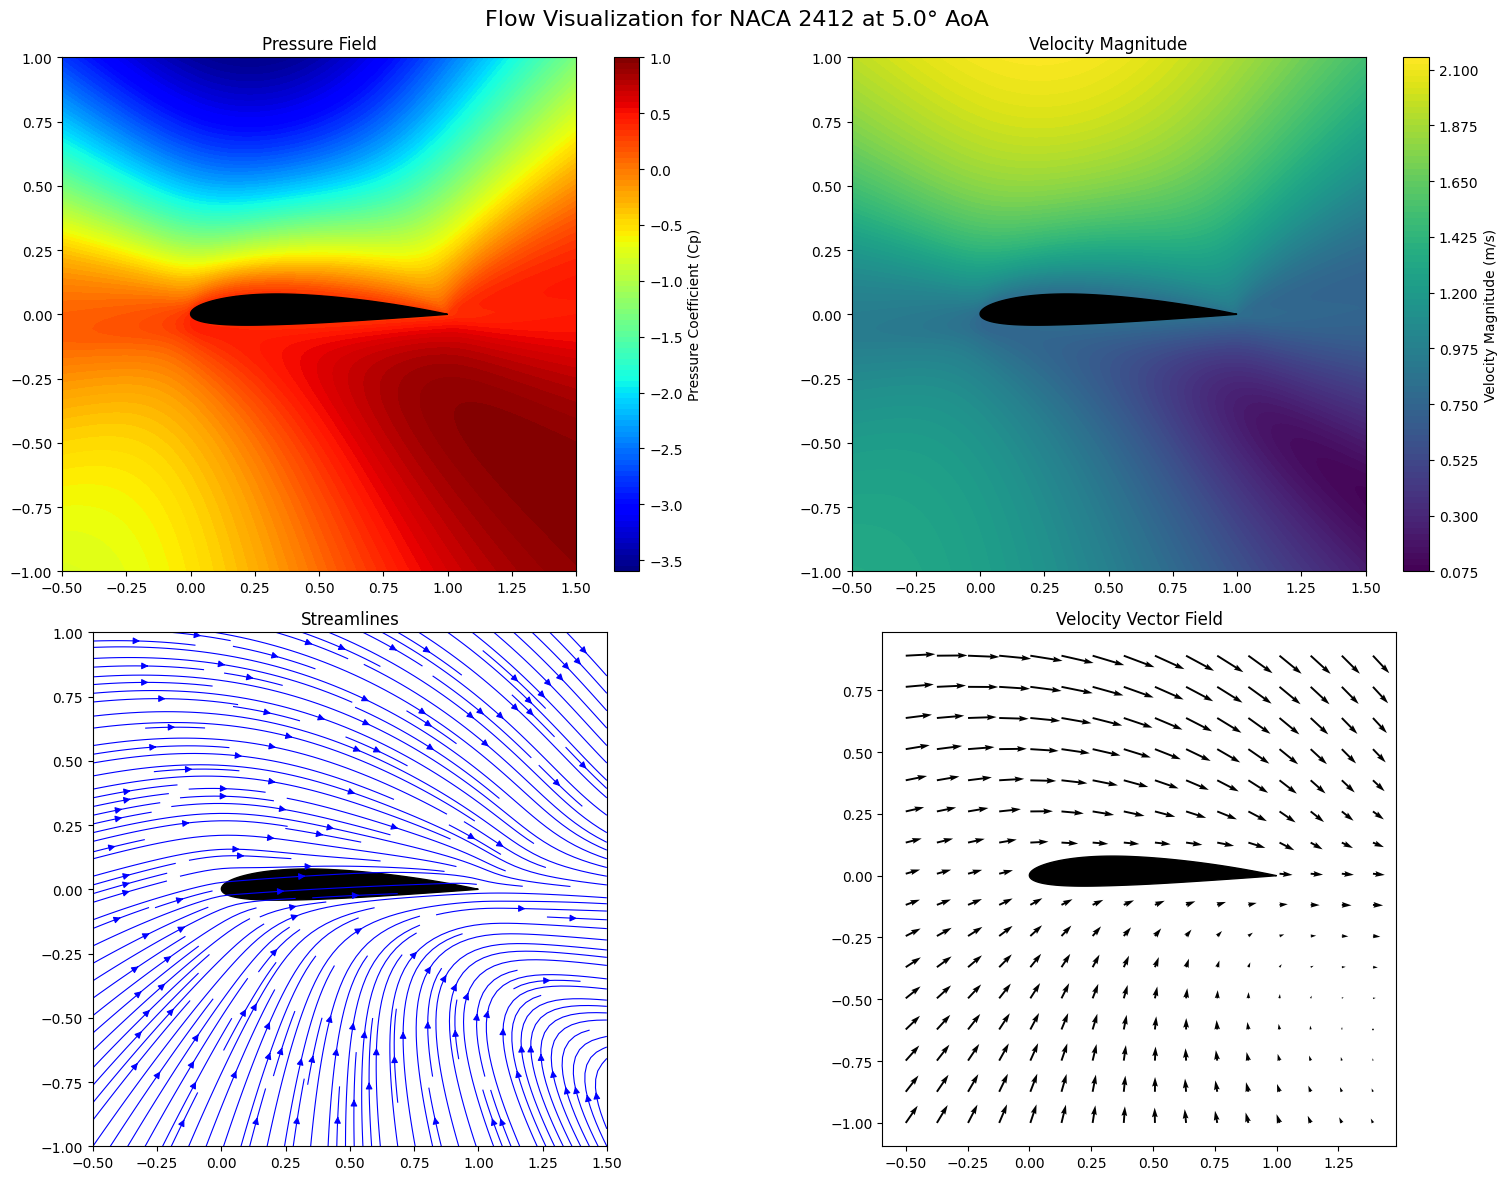

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

# (Paste the generate_naca4_coords function from Step 1 here)
def generate_naca4_coords(naca_code="2412", n_points=200):
    # ... (same code as before)
    if len(naca_code) != 4:
        raise ValueError("NACA code must be 4 digits long.")
    m = int(naca_code[0]) / 100.0
    p = int(naca_code[1]) / 10.0
    t = int(naca_code[2:]) / 100.0
    beta = np.linspace(0, np.pi, n_points // 2 + 1)
    x = (1 - np.cos(beta)) / 2
    y_t = 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1036 * x**4)
    y_c = np.zeros_like(x)
    dyc_dx = np.zeros_like(x)
    if p > 0:
        front_x = x[x <= p]
        back_x = x[x > p]
        y_c[x <= p] = (m / p**2) * (2 * p * front_x - front_x**2)
        y_c[x > p] = (m / (1 - p)**2) * ((1 - 2 * p) + 2 * p * back_x - back_x**2)
        dyc_dx[x <= p] = (2 * m / p**2) * (p - front_x)
        dyc_dx[x > p] = (2 * m / (1 - p)**2) * (p - back_x)
    theta = np.arctan(dyc_dx)
    x_upper = x - y_t * np.sin(theta)
    y_upper = y_c + y_t * np.cos(theta)
    x_lower = x + y_t * np.sin(theta)
    y_lower = y_c - y_t * np.cos(theta)
    coords = np.vstack([np.hstack([x_upper[::-1], x_lower[1:]]), np.hstack([y_upper[::-1], y_lower[1:]])]).T
    return coords

# (Paste the Panel Method Solver code from Step 3 here)
def panel_method_solver(coords, V_inf=1.0, alpha_deg=0.0):
    # ... (full solver code)
    num_panels = len(coords) - 1
    alpha_rad = np.deg2rad(alpha_deg)
    pcp = (coords[:-1] + coords[1:]) / 2
    dx = coords[1:, 0] - coords[:-1, 0]
    dy = coords[1:, 1] - coords[:-1, 1]
    S = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx)
    Vn = V_inf * np.sin(alpha_rad - theta)
    Vt = V_inf * np.cos(alpha_rad - theta)
    I = np.zeros((num_panels, num_panels))
    J = np.zeros((num_panels, num_panels))
    for i in range(num_panels):
        for j in range(num_panels):
            if i != j:
                A = -(pcp[i,0] - coords[j,0])*np.cos(theta[j]) - (pcp[i,1] - coords[j,1])*np.sin(theta[j])
                B = (pcp[i,0] - coords[j,0])**2 + (pcp[i,1] - coords[j,1])**2
                Cn = -np.cos(theta[i]-theta[j])
                Dn = (pcp[i,0] - coords[j,0])*np.cos(theta[i]) + (pcp[i,1] - coords[j,1])*np.sin(theta[i])
                I[i,j] = Cn/2*np.log((S[j]**2 + 2*A*S[j] + B)/B) + (Dn-A*Cn)/np.sqrt(B-A**2)*(np.arctan2((S[j]+A),np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2)))
                Ct = np.sin(theta[j]-theta[i])
                Dt = (pcp[i,0] - coords[j,0])*np.sin(theta[i]) - (pcp[i,1] - coords[j,1])*np.cos(theta[i])
                J[i,j] = Ct/2*np.log((S[j]**2 + 2*A*S[j] + B)/B) + (Dt-A*Ct)/np.sqrt(B-A**2)*(np.arctan2((S[j]+A),np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2)))
    np.fill_diagonal(I, np.pi)
    A = np.zeros((num_panels + 1, num_panels + 1))
    A[:num_panels, :num_panels] = I
    A[:num_panels, -1] = np.sum(J, axis=1)
    A[-1, 0] = J[0,0] + J[-1, -1]
    A[-1, -1] = 2*np.pi + np.sum(J[0, :]) + np.sum(J[-1, :])
    for j in range(1, num_panels):
        A[-1,j] = J[0,j] + J[-1,j-1]
    b = np.zeros(num_panels + 1)
    b[:-1] = -Vn * 2*np.pi
    b[-1] = -(Vt[0] + Vt[-1])*2*np.pi
    solution = np.linalg.solve(A, b)
    gamma = solution[:-1]
    Gamma = solution[-1]
    return gamma, Gamma

def get_flow_field(coords, gamma, Gamma, X, Y, V_inf=1.0, alpha_deg=0.0):
    # ... (full get_flow_field code)
    alpha_rad = np.deg2rad(alpha_deg)
    num_panels = len(coords) - 1
    dx = coords[1:, 0] - coords[:-1, 0]
    dy = coords[1:, 1] - coords[:-1, 1]
    S = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx)
    u = V_inf * np.cos(alpha_rad) * np.ones_like(X)
    v = V_inf * np.sin(alpha_rad) * np.ones_like(X)
    for i in range(num_panels):
        xc, yc = coords[i]
        A = -(X-xc)*np.cos(theta[i]) - (Y-yc)*np.sin(theta[i])
        B = (X-xc)**2 + (Y-yc)**2
        u_s = gamma[i]/(2*np.pi)*( (X-xc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 - (Y-yc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        v_s = gamma[i]/(2*np.pi)*( (Y-yc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 + (X-xc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        u_v = -Gamma/(2*np.pi)*( (Y-yc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 + (X-xc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        v_v = Gamma/(2*np.pi)*( (X-xc)*np.log( (S[i]**2+2*A*S[i]+B)/B )/2 - (Y-yc)*(np.arctan2(S[i]+A, np.sqrt(B-A**2)) - np.arctan2(A, np.sqrt(B-A**2))) )
        u += u_s + u_v
        v += v_s + v_v
    Cp_field = 1.0 - (u**2 + v**2) / V_inf**2
    return u, v, Cp_field

# --- Main part of the script ---
if __name__ == '__main__':
    # 1. Define grid and airfoil
    GRID_SIZE = 128
    x_range = (-0.5, 1.5)
    y_range = (-1.0, 1.0)
    x = np.linspace(x_range[0], x_range[1], GRID_SIZE)
    y = np.linspace(y_range[0], y_range[1], GRID_SIZE)
    X, Y = np.meshgrid(x, y)

    airfoil_coords = generate_naca4_coords(naca_code="2412", n_points=200)

    # 2. Set flow conditions
    angle_of_attack_deg = 5.0

    # 3. Run solver
    gamma, Gamma = panel_method_solver(airfoil_coords, alpha_deg=angle_of_attack_deg)
    Ux_field, Uy_field, Cp_field = get_flow_field(airfoil_coords, gamma, Gamma, X, Y, alpha_deg=angle_of_attack_deg)

    # 4. NEW: Calculate Velocity Magnitude
    V_mag = np.sqrt(Ux_field**2 + Uy_field**2)

    # 5. NEW: Create a 2x2 grid of plots for comprehensive visualization
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f"Flow Visualization for NACA 2412 at {angle_of_attack_deg}° AoA", fontsize=16)

    # --- Plot 1: Pressure Coefficient (Cp) ---
    cf1 = axs[0, 0].contourf(X, Y, Cp_field, levels=100, cmap='jet')
    fig.colorbar(cf1, ax=axs[0, 0], label="Pressure Coefficient (Cp)")
    axs[0, 0].fill(airfoil_coords[:, 0], airfoil_coords[:, 1], c='k')
    axs[0, 0].set_title("Pressure Field")
    axs[0, 0].set_aspect('equal')

    # --- Plot 2: Velocity Magnitude ---
    cf2 = axs[0, 1].contourf(X, Y, V_mag, levels=100, cmap='viridis')
    fig.colorbar(cf2, ax=axs[0, 1], label="Velocity Magnitude (m/s)")
    axs[0, 1].fill(airfoil_coords[:, 0], airfoil_coords[:, 1], c='k')
    axs[0, 1].set_title("Velocity Magnitude")
    axs[0, 1].set_aspect('equal')

    # --- Plot 3: Streamlines ---
    axs[1, 0].streamplot(X, Y, Ux_field, Uy_field, density=2, linewidth=0.8, color='b')
    axs[1, 0].fill(airfoil_coords[:, 0], airfoil_coords[:, 1], c='k')
    axs[1, 0].set_title("Streamlines")
    axs[1, 0].set_aspect('equal')

    # --- Plot 4: Velocity Vectors (Quiver Plot) ---
    # Downsample the grid for a cleaner vector plot
    skip = 8
    axs[1, 1].quiver(X[::skip, ::skip], Y[::skip, ::skip], Ux_field[::skip, ::skip], Uy_field[::skip, ::skip])
    axs[1, 1].fill(airfoil_coords[:, 0], airfoil_coords[:, 1], c='k')
    axs[1, 1].set_title("Velocity Vector Field")
    axs[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

In [28]:
import os
import numpy as np
from skimage.draw import polygon
from tqdm import tqdm
from sklearn.model_selection import train_test_split

class AirfoilSimulator:
    """A class to handle airfoil data generation and simulation."""
    def __init__(self, grid_size=128):
        self.grid_size = grid_size
        self.x_range = (-0.5, 1.5)
        self.y_range = (-1.0, 1.0)
        x = np.linspace(self.x_range[0], self.x_range[1], self.grid_size)
        y = np.linspace(self.y_range[0], self.y_range[1], self.grid_size)
        self.X_grid, self.Y_grid = np.meshgrid(x, y)

    def generate_sample(self, naca_code, alpha_deg, n_points=200):
        coords = self._generate_naca4_coords(naca_code, n_points)
        mask = self._create_airfoil_mask(coords)
        try:
            gamma, Gamma = self._panel_method_solver(coords, alpha_deg=alpha_deg)
            Ux, Uy, Cp = self._get_flow_field(coords, gamma, Gamma, alpha_deg=alpha_deg)
            Cp[mask == 1] = 0; Ux[mask == 1] = 0; Uy[mask == 1] = 0
            output_fields = np.stack([Cp, Ux, Uy], axis=-1)
            output_norm = self._normalize_output(output_fields)
            return mask, output_norm
        except (np.linalg.LinAlgError, ValueError):
            return None, None

    def _generate_naca4_coords(self, naca_code, n_points):
        m, p, t = int(naca_code[0])/100.0, int(naca_code[1])/10.0, int(naca_code[2:])/100.0
        beta = np.linspace(0, np.pi, n_points//2 + 1); x = (1 - np.cos(beta))/2
        y_t = 5*t*(0.2969*np.sqrt(x)-0.1260*x-0.3516*x**2+0.2843*x**3-0.1036*x**4)
        y_c, dyc_dx = np.zeros_like(x), np.zeros_like(x)
        if p > 0:
            f = x[x <= p]; b = x[x > p]
            y_c[x <= p] = (m/p**2)*(2*p*f-f**2); y_c[x > p] = (m/(1-p)**2)*((1-2*p)+2*p*b-b**2)
            dyc_dx[x <= p]=(2*m/p**2)*(p-f); dyc_dx[x > p]=(2*m/(1-p)**2)*(p-b)
        theta = np.arctan(dyc_dx)
        xu, yu = x-y_t*np.sin(theta), y_c+y_t*np.cos(theta)
        xl, yl = x+y_t*np.sin(theta), y_c-y_t*np.cos(theta)
        return np.vstack([np.hstack([xu[::-1],xl[1:]]),np.hstack([yu[::-1],yl[1:]])]).T

    def _create_airfoil_mask(self, coords):
        mask = np.zeros((self.grid_size, self.grid_size), dtype=np.float32)
        xc = ((coords[:,0]-self.x_range[0])/(self.x_range[1]-self.x_range[0]))*(self.grid_size-1)
        yc = ((coords[:,1]-self.y_range[0])/(self.y_range[1]-self.y_range[0]))*(self.grid_size-1)
        rr, cc = polygon(yc, xc, shape=mask.shape); mask[rr, cc] = 1.0
        return mask

    def _panel_method_solver(self, coords, V_inf=1.0, alpha_deg=0.0):
        num_panels=len(coords)-1; alpha_rad=np.deg2rad(alpha_deg)
        pcp=(coords[:-1]+coords[1:])/2; dx=coords[1:,0]-coords[:-1,0]; dy=coords[1:,1]-coords[:-1,1]
        S=np.sqrt(dx**2+dy**2); theta=np.arctan2(dy,dx); Vn=V_inf*np.sin(alpha_rad-theta); Vt=V_inf*np.cos(alpha_rad-theta)
        I,J=np.zeros((num_panels,num_panels)),np.zeros((num_panels,num_panels))
        for i in range(num_panels):
            for j in range(num_panels):
                if i!=j:
                    A=-(pcp[i,0]-coords[j,0])*np.cos(theta[j])-(pcp[i,1]-coords[j,1])*np.sin(theta[j]); B=(pcp[i,0]-coords[j,0])**2+(pcp[i,1]-coords[j,1])**2
                    Cn=-np.cos(theta[i]-theta[j]); Dn=(pcp[i,0]-coords[j,0])*np.cos(theta[i])+(pcp[i,1]-coords[j,1])*np.sin(theta[i])
                    I[i,j]=Cn/2*np.log((S[j]**2+2*A*S[j]+B)/B)+(Dn-A*Cn)/np.sqrt(B-A**2)*(np.arctan2(S[j]+A,np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2)))
                    Ct=np.sin(theta[j]-theta[i]); Dt=(pcp[i,0]-coords[j,0])*np.sin(theta[i])-(pcp[i,1]-coords[j,1])*np.cos(theta[i])
                    J[i,j]=Ct/2*np.log((S[j]**2+2*A*S[j]+B)/B)+(Dt-A*Ct)/np.sqrt(B-A**2)*(np.arctan2(S[j]+A,np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2)))
        np.fill_diagonal(I,np.pi); A=np.zeros((num_panels+1,num_panels+1)); A[:num_panels,:num_panels]=I; A[:num_panels,-1]=np.sum(J,axis=1)
        A[-1,0]=J[0,0]+J[-1,-1]; A[-1,-1]=2*np.pi+np.sum(J[0,:])+np.sum(J[-1,:]); b=np.zeros(num_panels+1)
        for j in range(1,num_panels): A[-1,j]=J[0,j]+J[-1,j-1]
        b[:-1]=-Vn*2*np.pi; b[-1]=-(Vt[0]+Vt[-1])*2*np.pi; sol=np.linalg.solve(A,b)
        return sol[:-1],sol[-1]

    def _get_flow_field(self, coords, gamma, Gamma, V_inf=1.0, alpha_deg=0.0):
        alpha_rad=np.deg2rad(alpha_deg); num_panels=len(coords)-1
        dx,dy=coords[1:,0]-coords[:-1,0],coords[1:,1]-coords[:-1,1]; S=np.sqrt(dx**2+dy**2); theta=np.arctan2(dy,dx)
        u,v=V_inf*np.cos(alpha_rad)*np.ones_like(self.X_grid),V_inf*np.sin(alpha_rad)*np.ones_like(self.X_grid)
        for i in range(num_panels):
            xc,yc=coords[i]; A=-(self.X_grid-xc)*np.cos(theta[i])-(self.Y_grid-yc)*np.sin(theta[i]); B=(self.X_grid-xc)**2+(self.Y_grid-yc)**2
            us=gamma[i]/(2*np.pi)*((self.X_grid-xc)*np.log((S[i]**2+2*A*S[i]+B)/B)/2-(self.Y_grid-yc)*(np.arctan2(S[i]+A,np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2))))
            vs=gamma[i]/(2*np.pi)*((self.Y_grid-yc)*np.log((S[i]**2+2*A*S[i]+B)/B)/2+(self.X_grid-xc)*(np.arctan2(S[i]+A,np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2))))
            uv=-Gamma/(2*np.pi)*((self.Y_grid-yc)*np.log((S[i]**2+2*A*S[i]+B)/B)/2+(self.X_grid-xc)*(np.arctan2(S[i]+A,np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2))))
            vv=Gamma/(2*np.pi)*((self.X_grid-xc)*np.log((S[i]**2+2*A*S[i]+B)/B)/2-(self.Y_grid-yc)*(np.arctan2(S[i]+A,np.sqrt(B-A**2))-np.arctan2(A,np.sqrt(B-A**2))))
            u+=us+uv; v+=vs+vv
        return u,v,1.0-(u**2+v**2)/V_inf**2

    def _normalize_output(self, fields):
        Cp,Ux,Uy=fields[...,0],fields[...,1],fields[...,2]
        Cp_n=np.clip((Cp - -4.0)/(1.0 - -4.0),0,1); Ux_n=np.clip((Ux - -0.5)/(1.5 - -0.5),0,1)
        Uy_n=np.clip((Uy - -1.0)/(1.0 - -1.0),0,1)
        return np.stack([Cp_n,Ux_n,Uy_n],axis=-1)

In [30]:
# --- Main Script ---
if __name__ == '__main__':
    # --- Configuration ---
    DATA_DIR = "airfoil_data"
    NUM_SAMPLES = 80
    os.makedirs(DATA_DIR, exist_ok=True)

    # 1. Generate all data in memory
    print("Step 1: Generating all data samples...")
    simulator = AirfoilSimulator(grid_size=128)
    X_data, y_data = [], []

    # Define parameter ranges for random sampling
    max_cambers = [0, 2, 4, 6]; camber_pos = [2, 3, 4, 5]
    thicknesses = [10, 12, 15, 18]; angles = np.linspace(-5, 12, 30)

    for _ in tqdm(range(NUM_SAMPLES)):
        m, p, t = np.random.choice(max_cambers), np.random.choice(camber_pos), np.random.choice(thicknesses)
        if m==0 and p==0: p=4
        alpha = np.random.choice(angles)
        naca_code = f"{m}{p}{t:02d}"

        X_sample, y_sample = simulator.generate_sample(naca_code, alpha)
        if X_sample is not None:
            X_data.append(X_sample)
            y_data.append(y_sample)

    # Convert to NumPy arrays and add channel dimension to X
    X = np.array(X_data).astype('float32')[..., np.newaxis]
    y = np.array(y_data).astype('float32')

    # 2. Split the data into 70/15/15 sets
    print("\nStep 2: Splitting data into 70/15/15 sets...")
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # 3. Save the three sets into separate .npz files
    print("Step 3: Saving the split datasets...")
    np.savez_compressed(os.path.join(DATA_DIR, 'train.npz'), X=X_train, y=y_train)
    np.savez_compressed(os.path.join(DATA_DIR, 'validation.npz'), X=X_val, y=y_val)
    np.savez_compressed(os.path.join(DATA_DIR, 'test.npz'), X=X_test, y=y_test)

    print(f"\n✅ Dataset creation complete in '{DATA_DIR}' directory!")

Step 1: Generating all data samples...


100%|██████████| 80/80 [03:37<00:00,  2.72s/it]



Step 2: Splitting data into 70/15/15 sets...
Step 3: Saving the split datasets...

✅ Dataset creation complete in 'airfoil_data' directory!
